## 1.  Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<b>Context</b>

Craigslist is the world's largest collection of used vehicles for sale, yet it's very difficult to collect all of them in the same place. I built a scraper for a school project and expanded upon it later to create this dataset which includes every used vehicle entry within the United States on Craigslist.

<b>Content</b>

This data is scraped every few months, it contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories. For ML projects, consider feature engineering on location columns such as long/lat. For previous listings, check older versions of the dataset.

id = entry ID

url = listing URL

region = craigslist region

region_ur = lregion URL

price = entry price

year = entry year

manufacturer = manufacturer of vehicle

model = model of vehicle

condition = condition of vehicle

cylinders = number of cylinders

fuel = fuel type

odometer = miles traveled by vehicle

title_status = title status of vehicle

transmission = transmission of vehicle

vinvehicle id = entification number

drive = type of drive

size = size of vehicle

type = generic type of vehicle

paint_color = color of vehicle

image_url = image URL

description = listed description of vehicle

county = useless column left in by mistake

state = state of listing

lat = latitude of listing

long = longitude of listing

In [2]:
df = pd.read_csv('vehicles.csv')

In [3]:
df.head()

id                                                url      region  \
0  7088746062  https://greensboro.craigslist.org/ctd/d/cary-2...  greensboro   
1  7088745301  https://greensboro.craigslist.org/ctd/d/bmw-3-...  greensboro   
2  7088744126  https://greensboro.craigslist.org/cto/d/greens...  greensboro   
3  7088743681  https://greensboro.craigslist.org/ctd/d/cary-2...  greensboro   
4  7074612539  https://lincoln.craigslist.org/ctd/d/gretna-20...     lincoln   

                          region_url  price    year manufacturer  \
0  https://greensboro.craigslist.org  10299  2012.0        acura   
1  https://greensboro.craigslist.org      0  2011.0          bmw   
2  https://greensboro.craigslist.org   9500  2011.0       jaguar   
3  https://greensboro.craigslist.org   3995  2004.0        honda   
4     https://lincoln.craigslist.org  41988  2016.0    chevrolet   

               model  condition    cylinders  ... drive  size         type  \
0                 tl        NaN          NaN  ...   NaN   NaN        other   
1                335        NaN  6 cylinders  ...   rwd   NaN  convertible   
2                 xf  excellent          NaN  ...   NaN   NaN          NaN   
3            element        NaN          NaN  ...   fwd   NaN          SUV   
4  silverado k2500hd        NaN          NaN  ...   NaN   NaN          NaN   

  paint_color                                          image_url  \
0        blue  https://images.craigslist.org/01414_3LIXs9EO33...   
1        blue  https://images.craigslist.org/00S0S_1kTatLGLxB...   
2        blue  https://images.craigslist.org/00505_f22HGItCRp...   
3      orange  https://images.craigslist.org/00E0E_eAUnhFF86M...   
4         NaN  https://images.craigslist.org/00S0S_8msT7RQquO...   

                                         description county state      lat  \
0  2012 Acura TL Base 4dr Sedan     Offered by: B...    NaN    nc  35.7636   
1  BMW 3 Series 335i Convertible Navigation Dakot...    NaN    nc      NaN   
2  2011 jaguar XF premium - estate sale. Retired ...    NaN    nc  36.1032   
3  2004 Honda Element LX 4dr SUV     Offered by: ...    NaN    nc  35.7636   
4  Shop Indoors, Heated Showroom!!!www.gretnaauto...    NaN    ne  41.1345   

      long  
0 -78.7443  
1      NaN  
2 -79.8794  
3 -78.7443  
4 -96.2458  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

In [5]:
df.describe()

id         price           year      odometer  county  \
count  5.397590e+05  5.397590e+05  538772.000000  4.407830e+05     0.0   
mean   7.087609e+09  1.954214e+05    2009.830982  1.008008e+05     NaN   
std    5.234176e+06  2.208252e+07       9.161334  1.767058e+05     NaN   
min    7.065765e+09  0.000000e+00       0.000000  0.000000e+00     NaN   
25%    7.084240e+09  4.400000e+03    2007.000000  4.703850e+04     NaN   
50%    7.088973e+09  9.500000e+03    2012.000000  9.330000e+04     NaN   
75%    7.092094e+09  1.792600e+04    2015.000000  1.377550e+05     NaN   
max    7.093537e+09  4.294967e+09    2021.000000  6.480922e+07     NaN   

                 lat           long  
count  530785.000000  530785.000000  
mean       38.432128     -94.040501  
std         5.916936      17.626658  
min       -84.911400    -176.810000  
25%        34.197100    -106.782000  
50%        39.077600     -88.100900  
75%        42.449100     -81.219000  
max        84.514800     161.016000

In [237]:
df.isnull().sum().sum()

2227259

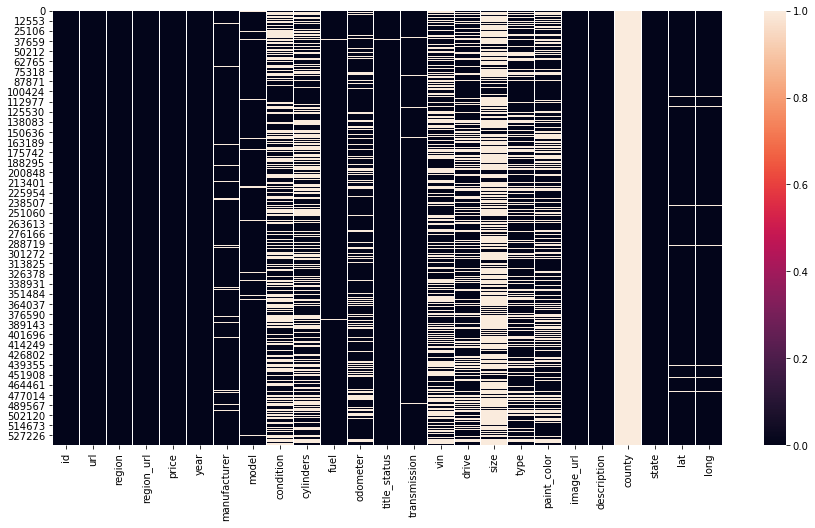

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

## 2. Data Cleaning

### 2.1 Make a new dataframe 

> We have to much rows so i reduce the rows with classification below:

1. the year of the car is > 2010
2. the odometer is < 13000
3. the price is not equal to zero and the price must be under $38215 (upper limit)

In [7]:
df.describe()['price']

count    5.397590e+05
mean     1.954214e+05
std      2.208252e+07
min      0.000000e+00
25%      4.400000e+03
50%      9.500000e+03
75%      1.792600e+04
max      4.294967e+09
Name: price, dtype: float64

In [8]:
q1 = df.describe()['price']['25%']
q3 = df.describe()['price']['75%']
iqr = q3 - q1
upper_limit = q3 + (1.5 * iqr)

upper_limit

38215.0

In [9]:
len(df[(df['year']>2010) & (df['odometer']<13000)])

18919

In [10]:
new_df = df[(df['year']>2010) & (df['odometer']<13000)]
new_df.drop(new_df[new_df['price']==0].index,axis=0,inplace=True)
new_df.drop(new_df[(new_df['price']>38215)].index,axis=0,inplace=True)

In [11]:
new_df.shape

(12559, 25)

In [12]:
new_df = new_df.reset_index()

In [13]:
new_df.head()

index          id                                                url  \
0     71  7082733849  https://richmond.craigslist.org/ctd/d/henrico-...   
1     96  7082731723  https://richmond.craigslist.org/ctd/d/henrico-...   
2    170  7085184639  https://quadcities.craigslist.org/cto/d/bellev...   
3    260  7088909969  https://rockford.craigslist.org/ctd/d/freeport...   
4    293  7088576866  https://greensboro.craigslist.org/ctd/d/greens...   

               region                         region_url  price    year  \
0            richmond    https://richmond.craigslist.org  25500  2016.0   
1            richmond    https://richmond.craigslist.org  12495  2018.0   
2  quad cities, IA/IL  https://quadcities.craigslist.org  14500  2017.0   
3            rockford    https://rockford.craigslist.org  15990  2018.0   
4          greensboro  https://greensboro.craigslist.org  20900  2017.0   

  manufacturer                model  condition  ... drive     size   type  \
0        lexus               es 350        NaN  ...   fwd      NaN  sedan   
1       nissan               sentra        NaN  ...   fwd      NaN    NaN   
2       nissan  nv200 compact cargo  excellent  ...   fwd  compact    van   
3         ford     fusion se hybrid       good  ...   fwd      NaN  sedan   
4         fiat     124 spider lusso       good  ...   rwd      NaN  other   

  paint_color                                          image_url  \
0      silver  https://images.craigslist.org/00p0p_hTHyPdjkT4...   
1       black  https://images.craigslist.org/01313_b8riYtFpxn...   
2       white  https://images.craigslist.org/00C0C_emBMeeMxfZ...   
3        grey  https://images.craigslist.org/00v0v_daD67LgzXc...   
4         NaN  https://images.craigslist.org/01616_ciMb8pPfE5...   

                                         description county state      lat  \
0  Call  or Text  (804) 212-0720    Stock Number:...    NaN    va  37.6237   
1  Nissan of Richmond address:    11401 West Broa...    NaN    va  37.6501   
2  White 2017 Nissan NV 200 Cargo D Van. 5,000 mi...    NaN    il  42.2582   
3  Recent Arrival! Fusion Hybrid SE I4 Hybrid, FW...    NaN    il  42.2991   
4  Welcome to Carvana—the new way to buy a car (e...    NaN    nc  36.0700   

      long  
0 -77.5303  
1 -77.6090  
2 -90.4356  
3 -89.6345  
4 -79.8200  

[5 rows x 26 columns]

In [14]:
new_df['cylinders'].unique()

array(['6 cylinders', nan, '4 cylinders', '8 cylinders', 'other',
       '5 cylinders', '10 cylinders', '3 cylinders', '12 cylinders'],
      dtype=object)

### 2.2 Drop Column

Column to drop:

1. index

2. id

3. Country

4. vin

5. url

6. Region_url

7. image_url

8. description

9. region


In [15]:
new_df.drop(['index','id','county','vin','url','region_url','image_url','description','region'],axis=1,inplace=True)

In [16]:
new_df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state', 'lat', 'long'],
      dtype='object')

In [17]:
new_df.head()

price    year manufacturer                model  condition    cylinders  \
0  25500  2016.0        lexus               es 350        NaN  6 cylinders   
1  12495  2018.0       nissan               sentra        NaN          NaN   
2  14500  2017.0       nissan  nv200 compact cargo  excellent  6 cylinders   
3  15990  2018.0         ford     fusion se hybrid       good  4 cylinders   
4  20900  2017.0         fiat     124 spider lusso       good          NaN   

  fuel  odometer title_status transmission drive     size   type paint_color  \
0  gas    2870.0        clean    automatic   fwd      NaN  sedan      silver   
1  gas   11111.0        clean    automatic   fwd      NaN    NaN       black   
2  gas    5000.0      rebuilt    automatic   fwd  compact    van       white   
3  gas    2678.0        clean    automatic   fwd      NaN  sedan        grey   
4  gas    5705.0        clean        other   rwd      NaN  other         NaN   

  state      lat     long  
0    va  37.6237 -77.5303  
1    va  37.6501 -77.6090  
2    il  42.2582 -90.4356  
3    il  42.2991 -89.6345  
4    nc  36.0700 -79.8200

### 2.3 Handling Column Year

In [18]:
new_df['year'] = new_df['year'].fillna(new_df['year'].mode()[0])

In [19]:
new_df['year'] = pd.to_datetime(new_df['year'],errors='coerce',format='%Y')

In [20]:
new_df.drop(new_df[new_df['year'].isna()].index,axis=0,inplace=True)

In [21]:
new_df['year'][0].year

2016

In [22]:
new_df.shape[0]

12559

In [23]:
def apply_year(col):
    return col.year

In [24]:
new_df['year'] = new_df['year'].apply(apply_year)

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12559 entries, 0 to 12558
Data columns (total 17 columns):
price           12559 non-null int64
year            12559 non-null int64
manufacturer    12113 non-null object
model           12223 non-null object
condition       7708 non-null object
cylinders       6737 non-null object
fuel            12471 non-null object
odometer        12559 non-null float64
title_status    12540 non-null object
transmission    12481 non-null object
drive           9306 non-null object
size            2659 non-null object
type            9992 non-null object
paint_color     9080 non-null object
state           12559 non-null object
lat             12306 non-null float64
long            12306 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 2.0+ MB


### 2.4 Fill NaN value

In [26]:
# fillna odometer
new_df['title_status'] = new_df['title_status'].fillna(value='unknown')

# fill nan manufacture
new_df['manufacturer'] = new_df['manufacturer'].fillna('Unknown')

# fill nan model
new_df['model'] = new_df['model'].fillna('Unknown')

In [27]:
for i in new_df.drop(['year','model','manufacturer','paint_color','title_status','condition',
                  'cylinders','type'],axis=1).columns:
    if new_df[i].dtype=='float':
        new_df[i] = new_df[i].fillna(df[i].mean())
    if new_df[i].dtype=='object':
        new_df[i] = new_df[i].fillna(df[i].mode()[0])

In [28]:
new_df.head()

price  year manufacturer                model  condition    cylinders fuel  \
0  25500  2016        lexus               es 350        NaN  6 cylinders  gas   
1  12495  2018       nissan               sentra        NaN          NaN  gas   
2  14500  2017       nissan  nv200 compact cargo  excellent  6 cylinders  gas   
3  15990  2018         ford     fusion se hybrid       good  4 cylinders  gas   
4  20900  2017         fiat     124 spider lusso       good          NaN  gas   

   odometer title_status transmission drive       size   type paint_color  \
0    2870.0        clean    automatic   fwd  full-size  sedan      silver   
1   11111.0        clean    automatic   fwd  full-size    NaN       black   
2    5000.0      rebuilt    automatic   fwd    compact    van       white   
3    2678.0        clean    automatic   fwd  full-size  sedan        grey   
4    5705.0        clean        other   rwd  full-size  other         NaN   

  state      lat     long  
0    va  37.6237 -77.5303  
1    va  37.6501 -77.6090  
2    il  42.2582 -90.4356  
3    il  42.2991 -89.6345  
4    nc  36.0700 -79.8200

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12559 entries, 0 to 12558
Data columns (total 17 columns):
price           12559 non-null int64
year            12559 non-null int64
manufacturer    12559 non-null object
model           12559 non-null object
condition       7708 non-null object
cylinders       6737 non-null object
fuel            12559 non-null object
odometer        12559 non-null float64
title_status    12559 non-null object
transmission    12559 non-null object
drive           12559 non-null object
size            12559 non-null object
type            9992 non-null object
paint_color     9080 non-null object
state           12559 non-null object
lat             12559 non-null float64
long            12559 non-null float64
dtypes: float64(3), int64(2), object(12)
memory usage: 2.0+ MB


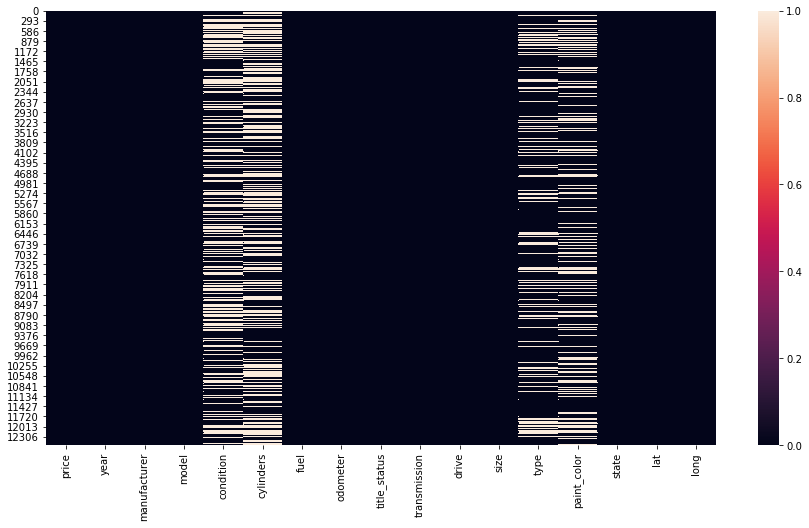

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.isnull())

### 2.5 Handling column Manufacturer 

> i decide to drop rows who contain harley-davidson because that rown si too many NaN values, and i think people who want buy used car is never looking used car that manufactured by Harley-Davidson.

In [31]:
new_df[new_df['manufacturer'] =='harley-davidson']

price  year     manufacturer                          model  condition  \
164    12999  2019  harley-davidson                   softail slim        NaN   
168    14999  2016  harley-davidson                    dyna street        NaN   
193    19599  2019  harley-davidson                       heritage        NaN   
204    19000  2016  harley-davidson                   street glide        NaN   
208    10599  2016  harley-davidson                 dyna low rider        NaN   
...      ...   ...              ...                            ...        ...   
10941   8500  2019  harley-davidson       davidson xl883n/iron 883        NaN   
11792  10495  2017  harley-davidson  xl1200x sportster forty-eight  excellent   
11794   9495  2018  harley-davidson      xl883n sportster iron 883  excellent   
11795   8495  2016  harley-davidson      xl883n sportster iron 883  excellent   
12315   4995  2012  harley-davidson                davidson xl1200  excellent   

      cylinders fuel  odometer title_status transmission drive       size  \
164         NaN  gas     907.0        clean       manual   4wd  full-size   
168         NaN  gas    6054.0        clean       manual   4wd  full-size   
193         NaN  gas    3606.0        clean       manual   4wd  full-size   
204         NaN  gas    4611.0        clean       manual   4wd  full-size   
208         NaN  gas   10290.0        clean       manual   4wd  full-size   
...         ...  ...       ...          ...          ...   ...        ...   
10941       NaN  gas      34.0        clean    automatic   4wd  full-size   
11792       NaN  gas    2358.0        clean    automatic   4wd  full-size   
11794       NaN  gas    1902.0        clean    automatic   4wd  full-size   
11795       NaN  gas    7722.0        clean    automatic   4wd  full-size   
12315       NaN  gas    4515.0        clean    automatic   4wd  full-size   

        type paint_color state      lat      long  
164      NaN       black    tx  27.7587  -97.4612  
168      NaN         NaN    tx  27.7587  -97.4612  
193      NaN         NaN    tx  27.7587  -97.4612  
204      NaN       black    tx  27.7587  -97.4612  
208      NaN        blue    tx  27.7587  -97.4612  
...      ...         ...   ...      ...       ...  
10941  other         NaN    il  38.2094  -91.1737  
11792    NaN         NaN    nv  36.1265 -115.2130  
11794    NaN         NaN    nv  36.1265 -115.2130  
11795    NaN         NaN    nv  36.1265 -115.2130  
12315    NaN         NaN    ok  33.3750  -97.1767  

[62 rows x 17 columns]

In [32]:
index_harley = new_df[new_df['manufacturer'] =='harley-davidson'].index

In [33]:
new_df.drop(index_harley,axis=0,inplace=True)

In [34]:
new_df[new_df['manufacturer'] =='harley-davidson']

Empty DataFrame
Columns: [price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, drive, size, type, paint_color, state, lat, long]
Index: []

### 2.6 Handling column Manufacturer 

In [35]:
def replace_cylinders(col):
    try:
        return col.split()[0]
    except:
        return 'error'

In [36]:
new_df['cylinders'] = new_df['cylinders'].apply(replace_cylinders)

In [37]:
new_df['cylinders'] = pd.to_numeric(new_df['cylinders'],errors='coerce')

#### 2.6.1 Fill NaN Values in column cylinders with mode for each Manufacturer

In [38]:
new_df['manufacturer'].unique()

array(['lexus', 'nissan', 'ford', 'fiat', 'honda', 'toyota', 'chrysler',
       'Unknown', 'bmw', 'mercedes-benz', 'kia', 'dodge', 'volkswagen',
       'chevrolet', 'mazda', 'ram', 'hyundai', 'subaru', 'buick', 'mini',
       'gmc', 'jeep', 'cadillac', 'acura', 'lincoln', 'rover',
       'mitsubishi', 'volvo', 'audi', 'infiniti', 'jaguar', 'tesla',
       'alfa-romeo'], dtype=object)

In [39]:
man_val = new_df['manufacturer'].unique()

In [40]:
val1_new = []
for i in new_df['manufacturer'].unique():
    val1_new.append(new_df[new_df['manufacturer'] ==i]['cylinders'].mode()[0])

In [41]:
val1_new

[4.0,
 4.0,
 6.0,
 4.0,
 4.0,
 6.0,
 6.0,
 4.0,
 4.0,
 4.0,
 4.0,
 6.0,
 4.0,
 8.0,
 4.0,
 8.0,
 4.0,
 4.0,
 4.0,
 4.0,
 8.0,
 4.0,
 6.0,
 6.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 6.0,
 4.0,
 10.0,
 4.0]

In [42]:
dictionary = dict(zip(man_val, val1_new))

In [43]:
dictionary

{'lexus': 4.0,
 'nissan': 4.0,
 'ford': 6.0,
 'fiat': 4.0,
 'honda': 4.0,
 'toyota': 6.0,
 'chrysler': 6.0,
 'Unknown': 4.0,
 'bmw': 4.0,
 'mercedes-benz': 4.0,
 'kia': 4.0,
 'dodge': 6.0,
 'volkswagen': 4.0,
 'chevrolet': 8.0,
 'mazda': 4.0,
 'ram': 8.0,
 'hyundai': 4.0,
 'subaru': 4.0,
 'buick': 4.0,
 'mini': 4.0,
 'gmc': 8.0,
 'jeep': 4.0,
 'cadillac': 6.0,
 'acura': 6.0,
 'lincoln': 4.0,
 'rover': 4.0,
 'mitsubishi': 4.0,
 'volvo': 4.0,
 'audi': 4.0,
 'infiniti': 6.0,
 'jaguar': 4.0,
 'tesla': 10.0,
 'alfa-romeo': 4.0}

In [44]:
new_df['cylinders'].fillna(new_df['manufacturer'].map(dictionary),inplace=True)

In [45]:
new_df['cylinders'].isna().value_counts(normalize=True)

False    1.0
Name: cylinders, dtype: float64

#### 2.6.2 Fill NaN Values in column condition with mode for each Manufacturer

In [46]:
new_df[new_df['manufacturer'] =='bmw']['condition'].mode()[0]

'good'

In [47]:
man_val = new_df['manufacturer'].unique()

In [48]:
val2_new = []
for i in new_df['manufacturer'].unique():
    val2_new.append(new_df[new_df['manufacturer'] ==i]['condition'].mode()[0])

In [49]:
dictionary2 = dict(zip(man_val, val2_new))

In [50]:
new_df['condition'].fillna(new_df['manufacturer'].map(dictionary2),inplace=True)

In [51]:
new_df['condition'].isna().value_counts(normalize=True)

False    1.0
Name: condition, dtype: float64

#### 2.6.3 Fill NaN Values in column type with mode for each Manufacturer

In [52]:
new_df[new_df['manufacturer'] =='bmw']['type'].mode()[0]

'sedan'

In [53]:
man_val = new_df['manufacturer'].unique()

In [54]:
val3_new = []
for i in new_df['manufacturer'].unique():
    val3_new.append(new_df[new_df['manufacturer'] ==i]['type'].mode()[0])

In [55]:
dictionary3 = dict(zip(man_val, val3_new))

In [56]:
new_df['type'].fillna(new_df['manufacturer'].map(dictionary3),inplace=True)

In [57]:
new_df['type'].isna().value_counts(normalize=True)

False    1.0
Name: type, dtype: float64

#### 2.6.4 Fill NaN Values in column paint_color with mode for each Manufacturer

In [58]:
val4_new = []
for i in new_df['manufacturer'].unique():
    val4_new.append(new_df[new_df['manufacturer'] ==i]['paint_color'].mode()[0])

In [59]:
dictionary4 = dict(zip(man_val, val4_new))

In [60]:
new_df['paint_color'].fillna(new_df['manufacturer'].map(dictionary4),inplace=True)

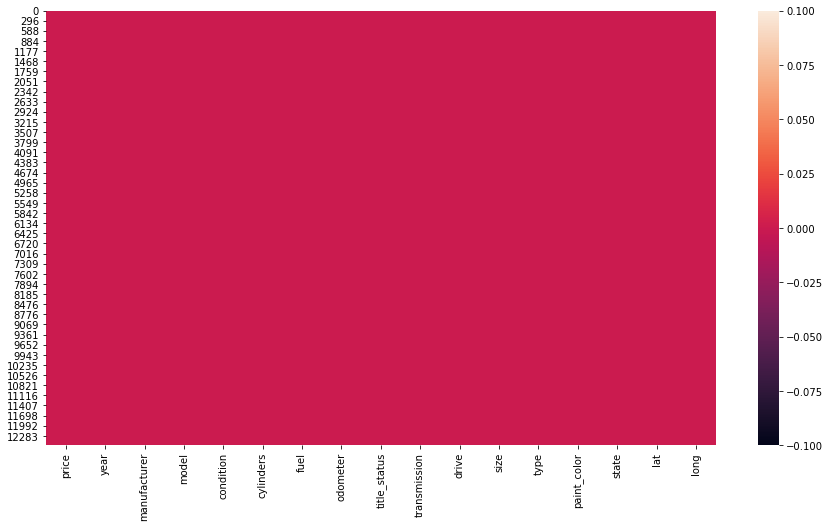

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.isnull())

## 3. Exploratory Data Analysis

### 3.1.1 histogram price column

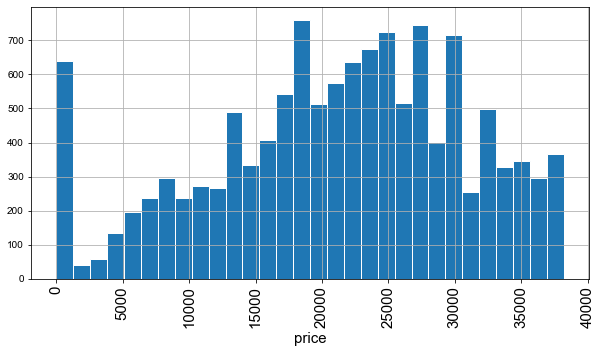

In [62]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=15)
plt.xlabel('price', size = 15)
sns.set_style('whitegrid')

new_df['price'].hist(bins=30)

> why there is any car with price 0-10? i think this car is rent car or just a prototype used for display in stores, so the price is so cheap and i think it's doesn't make any sense if the use car with good or excellent condition has the price between 0-10.

In [63]:
new_df[(new_df['price']>0) & (new_df['price']<10)]

price  year manufacturer                    model  condition  \
84         1  2011    chevrolet                  Unknown  excellent   
610        3  2012      Unknown  International Terrastar        new   
639        1  2013         mini         cooper s hardtop   like new   
1785       1  2012    chevrolet                   malibu       good   
1789       1  2012    chevrolet                   malibu       good   
...      ...   ...          ...                      ...        ...   
12005      1  2017      hyundai                   sonata       good   
12027      1  2014    chevrolet                silverado   like new   
12032      1  2014    chevrolet                silverado   like new   
12214      1  2011    chevrolet                  Unknown  excellent   
12413      1  2019    chevrolet         silverado 2500hd   like new   

       cylinders    fuel  odometer title_status transmission drive       size  \
84           8.0     gas      42.0        clean    automatic   4wd  full-size   
610          8.0  diesel     100.0        clean    automatic   rwd  full-size   
639          4.0     gas      60.0        clean       manual   fwd  full-size   
1785         8.0     gas     124.0        clean    automatic   4wd  full-size   
1789         8.0     gas     124.0        clean    automatic   4wd  full-size   
...          ...     ...       ...          ...          ...   ...        ...   
12005        4.0     gas    3936.0        clean    automatic   fwd  full-size   
12027        8.0     gas      42.0        clean    automatic   4wd  full-size   
12032        8.0     gas      42.0        clean    automatic   4wd  full-size   
12214        8.0     gas      42.0        clean    automatic   4wd  full-size   
12413        8.0     gas   11972.0        clean    automatic   4wd  full-size   

            type paint_color state      lat     long  
84         truck       black    fl  30.4738 -87.2470  
610        truck       white    pa  40.6839 -75.5202  
639    hatchback       black    pa  40.1083 -76.5103  
1785      pickup       white    al  33.5207 -86.8025  
1789      pickup       white    al  33.5207 -86.8025  
...          ...         ...   ...      ...      ...  
12005      sedan       white    fl  27.2987 -82.4893  
12027      truck       black    fl  30.4740 -87.2470  
12032      truck       black    fl  30.4740 -87.2470  
12214      truck       black    fl  30.4738 -87.2470  
12413     pickup       white    ny  43.2203 -77.5994  

[293 rows x 17 columns]

In [64]:
new_df[(new_df['price']>0) & (new_df['price']<10) & (new_df['manufacturer']<'chevrolet')]

price  year manufacturer                    model  condition  \
610        3  2012      Unknown  International Terrastar        new   
2384       1  2014          bmw                 7-series  excellent   
2386       1  2017      Unknown     Maserati GranTurismo  excellent   
2760       1  2014          bmw                 7-series  excellent   
3173       1  2014          bmw                 7-series  excellent   
3413       1  2017      Unknown     Maserati GranTurismo  excellent   
3545       1  2017      Unknown     Maserati GranTurismo  excellent   
3580       1  2017      Unknown     Maserati GranTurismo  excellent   
3663       1  2016      Unknown       Any Make And Model  excellent   
4498       1  2017      Unknown     Maserati GranTurismo  excellent   
5706       1  2012      Unknown                 Non ext.    salvage   
5874       1  2017      Unknown     Maserati GranTurismo  excellent   
5932       1  2017      Unknown     Maserati GranTurismo  excellent   
7633       1  2014          bmw                 7-series  excellent   
10974      1  2017      Unknown     Maserati GranTurismo  excellent   
10994      1  2014          bmw                 7-series  excellent   
11921      1  2014          bmw                 7-series  excellent   

       cylinders    fuel  odometer title_status transmission drive       size  \
610          8.0  diesel     100.0        clean    automatic   rwd  full-size   
2384         8.0     gas       1.0        clean    automatic   rwd    compact   
2386        10.0     gas    8206.0        clean        other   4wd   mid-size   
2760         8.0     gas       0.0        clean    automatic   rwd    compact   
3173         8.0     gas       0.0        clean    automatic   rwd    compact   
3413        10.0     gas    8206.0        clean        other   4wd   mid-size   
3545        10.0     gas    8206.0        clean        other   4wd   mid-size   
3580        10.0     gas    8206.0        clean        other   4wd   mid-size   
3663         4.0     gas       0.0        clean    automatic   4wd  full-size   
4498        10.0     gas    8206.0        clean        other   4wd   mid-size   
5706        12.0   other     205.0      salvage        other   4wd  full-size   
5874        10.0     gas    8206.0        clean        other   4wd   mid-size   
5932        10.0     gas    8206.0        clean        other   4wd   mid-size   
7633         8.0     gas       0.0        clean    automatic   rwd    compact   
10974       10.0     gas    8206.0        clean        other   4wd   mid-size   
10994        8.0     gas       0.0        clean    automatic   rwd    compact   
11921        8.0     gas       0.0        clean    automatic   rwd    compact   

        type paint_color state      lat      long  
610    truck       white    pa  40.6839  -75.5202  
2384   sedan        blue    fl  28.4661  -81.3964  
2386   coupe        blue    fl  28.4661  -81.3964  
2760   sedan        blue    fl  28.4661  -81.3964  
3173   sedan        blue    fl  28.4661  -81.3964  
3413   coupe        blue    fl  28.4661  -81.3964  
3545   coupe        blue    fl  28.4661  -81.3964  
3580   coupe        blue    fl  28.4661  -81.3964  
3663   other       white    az  32.2504 -110.9780  
4498   coupe        blue    fl  28.4661  -81.3964  
5706   truck       white    ks  39.4138  -96.4374  
5874   coupe        blue    fl  28.4661  -81.3964  
5932   coupe        blue    fl  28.4661  -81.3964  
7633   sedan        blue    fl  28.4661  -81.3964  
10974  coupe        blue    fl  28.4661  -81.3964  
10994  sedan        blue    fl  28.4661  -81.3964  
11921  sedan        blue    fl  28.4661  -81.3964

### 3.1.2 histogram type column

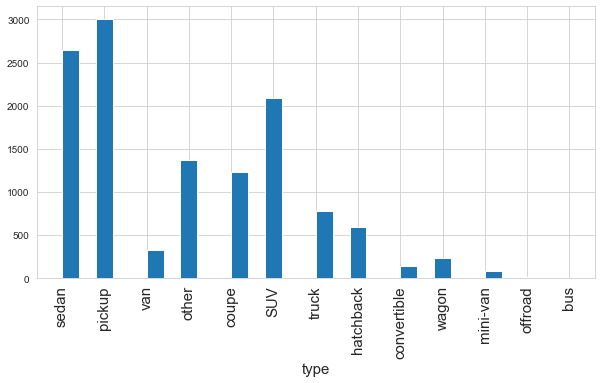

In [65]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=15)
plt.xlabel('type', size = 15)
sns.set_style('whitegrid')

new_df['type'].hist(bins=30)

> for that column we know that used car pick up type is most sought after by buyers

### 3.1.3 histogram manufacturer column

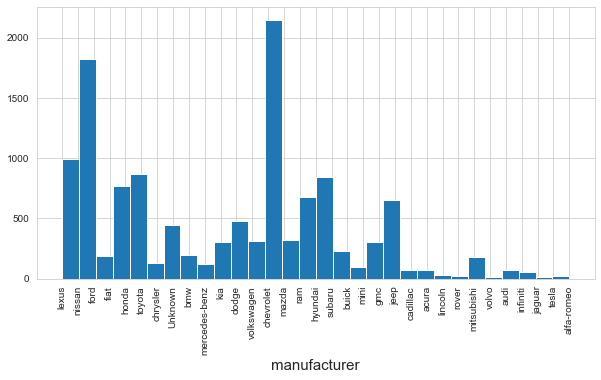

In [66]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel('manufacturer', size = 15)
sns.set_style('whitegrid')

new_df['manufacturer'].hist(bins=30)

> for that column we know that used car manufactured by ford and chevrolet is most sought after by buyers. I think if we buy a new car manufactured by Ford and Chevrolet it will cost more than the price of the used car.

### 3.1.4 histogram condition column

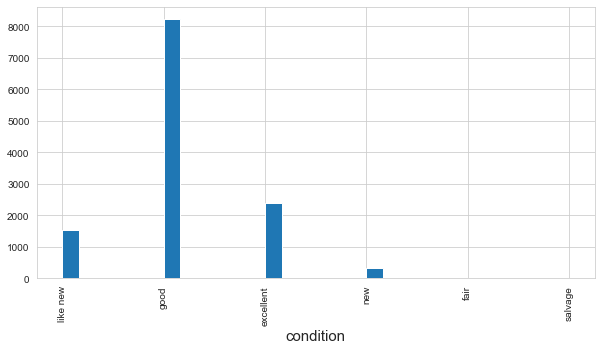

In [67]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel('condition', size = 15)
sns.set_style('whitegrid')

new_df['condition'].hist(bins=30)

> why many people sell his car with a good condition better than excellent condition? in my opinion people who have a car with excellent condition prefer to save the car instead of selling it. 

> and why many people sell his car with a good condition better than new condition? i think buyers will prefer buying a new car rather than buying a used car with new conditions

### 3.2 corelation price with manufacturer, type, and condition (bar plot)

#### 3.2.1 with manufacturer

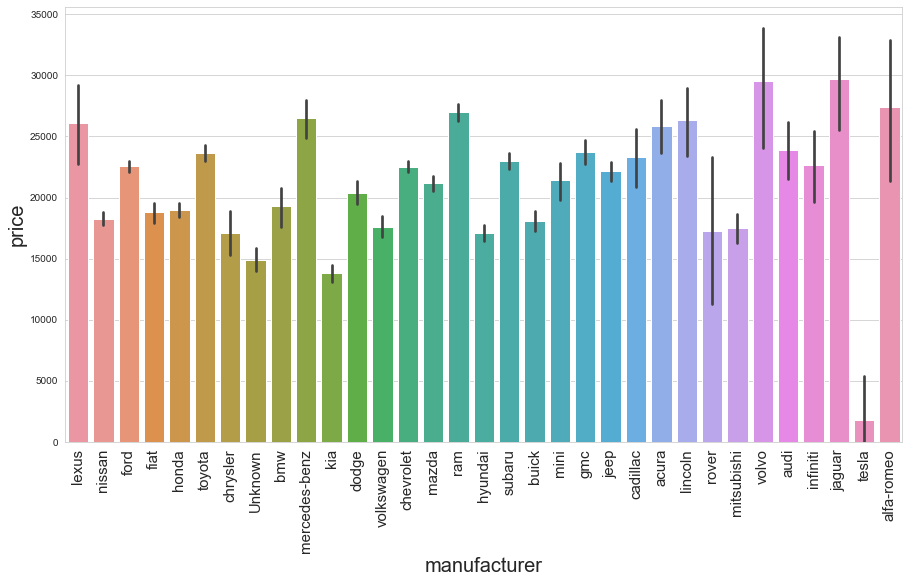

In [68]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90, size=15)
plt.ylabel('price', size = 20)
plt.xlabel('manufacturer', size = 20)
sns.set_style('whitegrid')
sns.barplot(x='manufacturer',y='price',data=new_df)

#### 3.2.2 with type

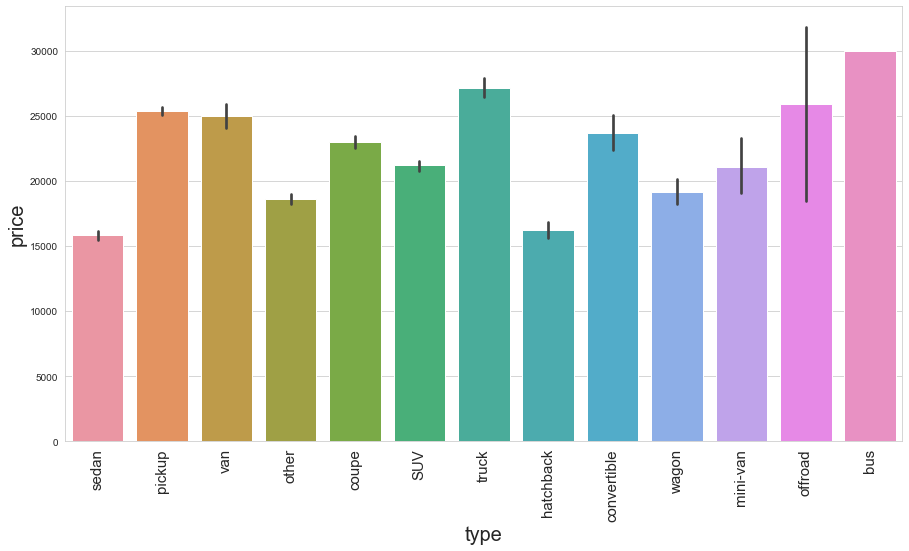

In [69]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90, size=15)
plt.ylabel('price', size = 20)
plt.xlabel('type', size = 20)
sns.set_style('whitegrid')
sns.barplot(x='type',y='price',data=new_df)

#### 3.2.3 with condition

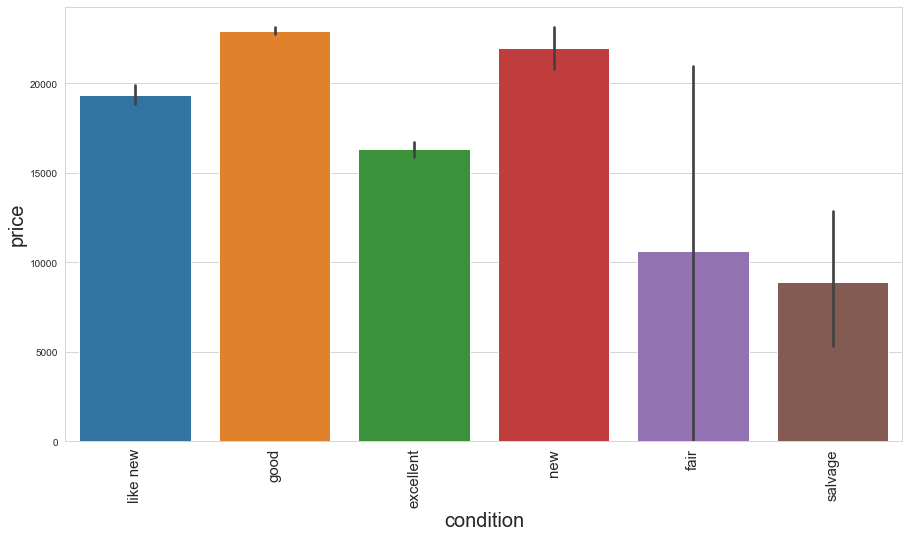

In [70]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90, size=15)
plt.ylabel('price', size = 20)
plt.xlabel('condition', size = 20)
sns.set_style('whitegrid')
sns.barplot(x='condition',y='price',data=new_df)

### 3.3 count plot state, year, cylinders, and fuel

In [71]:
import plotly.graph_objects as go
import plotly.express as px

#### 3.3.1 with state

In [72]:
val = new_df['type'].value_counts().values
names = new_df['type'].value_counts().index
fig = px.pie(new_df, values=val, names=names)
fig.show()

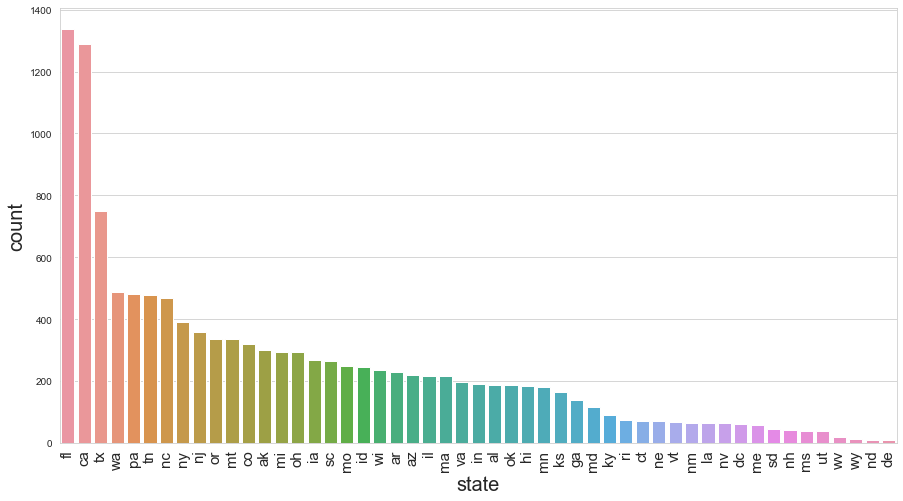

In [73]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90, size=15)
plt.ylabel('count', size = 20)
plt.xlabel('state', size = 20)

sns.countplot(x='state',data=new_df,order=new_df['state'].value_counts().index)

#### 3.3.2 with year

In [74]:
val = new_df['year'].value_counts().values
names = new_df['year'].value_counts().index
fig = px.pie(new_df, values=val, names=names)
fig.show()

In [75]:
# plt.figure(figsize=(15,8))
# plt.xticks(rotation=90, size=15)
# plt.ylabel('count', size = 20)
# plt.xlabel('state', size = 20)

# sns.countplot(x='year',data=new_df)

#### 3.3.3 with cylinders

In [76]:
val = new_df['cylinders'].value_counts().values
names = new_df['cylinders'].value_counts().index
fig = px.pie(new_df, values=val, names=names)
fig.show()

In [77]:
# plt.figure(figsize=(15,8))
# plt.xticks(rotation=90, size=15)
# plt.ylabel('count', size = 20)
# plt.xlabel('cylinders', size = 20)

# sns.countplot(x='cylinders',data=new_df)

#### 3.3.4 with fuel

In [78]:
val = new_df['fuel'].value_counts().values
names = new_df['fuel'].value_counts().index
fig = px.pie(new_df, values=val, names=names)
fig.show()

In [79]:
# plt.figure(figsize=(15,8))
# plt.xticks(rotation=90, size=15)
# plt.ylabel('count', size = 20)
# plt.xlabel('fuel', size = 20)

# sns.countplot(x='fuel',data=new_df)

## 4. Statistic
### 4.1 Check column that have good correlation with price column

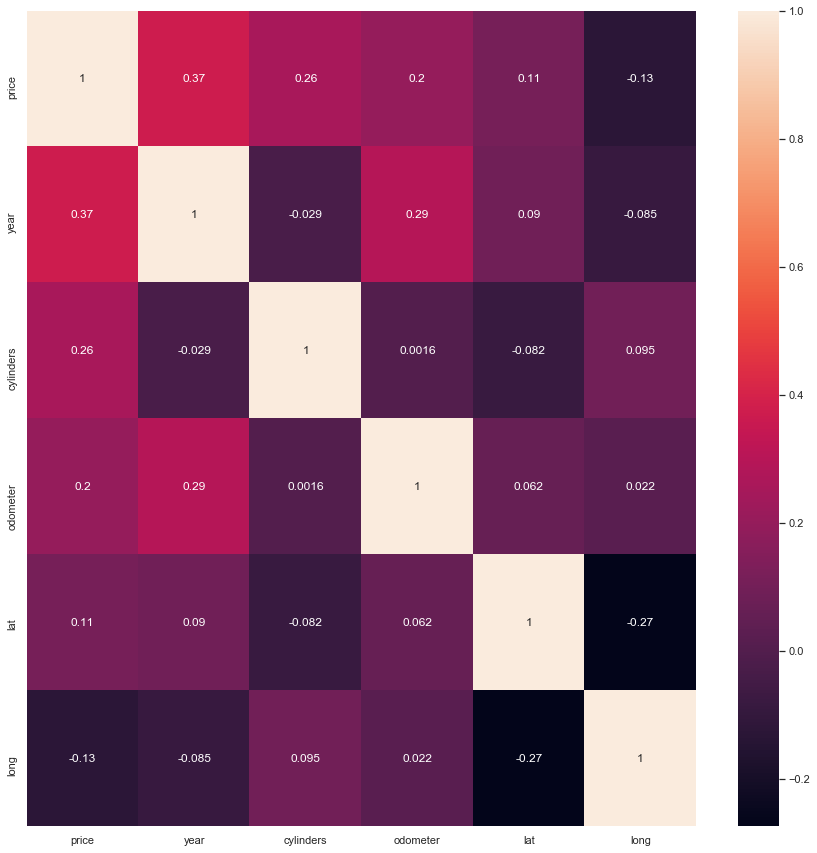

In [203]:
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(),annot=True)

1. Hypothesis : i assume that it's possible to predict price column using one column that have a good correlation with price column.

2. H0 : yes, i can predict price column using one column that have a good correlation with price column

3. H1 : No, i can't predict price column using one column that have a good correlation with price column

> columns year, cylinders , and odometer have a good corelation with price column

> then, we doing normality test for check the normality 

### 4.2 Check normality for each column using qqplot

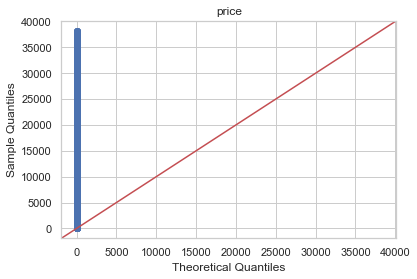

In [197]:
import statsmodels.api as sm 
import pylab
def create_qqplot(data,title):
    sm.qqplot(data, line='45')
    plt.title(title)
    pylab.show()
create_qqplot(new_df['price'],'price')

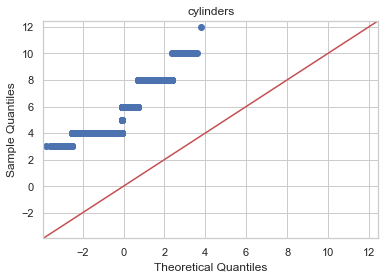

In [198]:
def create_qqplot(data,title):
    sm.qqplot(data, line='45')
    plt.title(title)
    pylab.show()
create_qqplot(new_df['cylinders'],'cylinders')

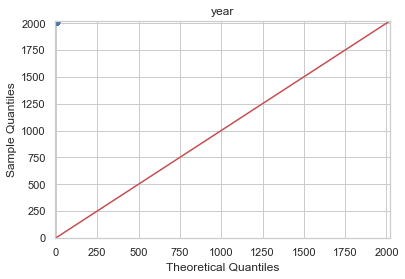

In [199]:
def create_qqplot(data,title):
    sm.qqplot(data, line='45')
    plt.title(title)
    pylab.show()
create_qqplot(new_df['year'],'year')

### 4.3 check normality using anderson and stats

In [81]:
from scipy.stats import anderson

def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [82]:
try_normal(new_df['year'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 742.1876964349904}}

In [83]:
try_normal(new_df['cylinders'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 1144.6663910377774}}

In [84]:
try_normal(new_df['odometer'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.092,
  'stat': 360.875904761946}}

> From anderson test, we conclude that data not normal dist. so we use non-parametric test.

> I use kruskal-wallis testing, because i use more than 2 data

signifance level (5%->0.05)

- 'H': The Kruskal-Walis H statistic , Corrected for ties-
- 'p-unc' : uncorrected p-value
- 'dof' : degrees of freedom

In [85]:
from pingouin import kruskal

In [195]:
kruskal(data=new_df,dv='price',between='year')

Source  ddof1         H  p-unc
Kruskal   year     10  1849.853    0.0

In [204]:
kruskal(data=new_df,dv='price',between='cylinders')

Source  ddof1         H  p-unc
Kruskal  cylinders      6  1929.661    0.0

In [205]:
kruskal(data=new_df,dv='price',between='odometer')

Source  ddof1         H  p-unc
Kruskal  odometer   3987  8755.518    0.0

> From kruskal-wallis test we conclude to reject H0 and accept H1

In [201]:
from pingouin import pairwise_ttests
pairwise_ttests(data=new_df,dv='price',between='cylinders', parametric=False)

Contrast     A     B  Paired  Parametric       U-val       Tail  \
0   cylinders   6.0   4.0   False       False  14263030.5  two-sided   
1   cylinders   6.0   8.0   False       False   4429181.0  two-sided   
2   cylinders   6.0   5.0   False       False     58987.5  two-sided   
3   cylinders   6.0  10.0   False       False    361327.0  two-sided   
4   cylinders   6.0   3.0   False       False    202829.5  two-sided   
5   cylinders   6.0  12.0   False       False      3571.5  two-sided   
6   cylinders   4.0   8.0   False       False   4325678.0  two-sided   
7   cylinders   4.0   5.0   False       False     87915.5  two-sided   
8   cylinders   4.0  10.0   False       False    588273.0  two-sided   
9   cylinders   4.0   3.0   False       False    272948.5  two-sided   
10  cylinders   4.0  12.0   False       False      5821.0  two-sided   
11  cylinders   8.0   5.0   False       False     47891.0  two-sided   
12  cylinders   8.0  10.0   False       False    284955.0  two-sided   
13  cylinders   8.0   3.0   False       False    171540.0  two-sided   
14  cylinders   8.0  12.0   False       False      2814.5  two-sided   
15  cylinders   5.0  10.0   False       False      1919.0  two-sided   
16  cylinders   5.0   3.0   False       False       331.0  two-sided   
17  cylinders   5.0  12.0   False       False        19.0  two-sided   
18  cylinders  10.0   3.0   False       False       216.0  two-sided   
19  cylinders  10.0  12.0   False       False        53.5  two-sided   
20  cylinders   3.0  12.0   False       False        72.0  two-sided   

            p-unc  hedges  
0   4.083425e-183   0.580  
1    7.862519e-21  -0.216  
2    5.047865e-08   1.495  
3    7.230483e-59   2.399  
4    2.231606e-16   0.943  
5    8.879397e-02   2.491  
6   2.295546e-290  -0.820  
7    1.199011e-05   1.047  
8    6.450153e-60   2.034  
9    1.623459e-05   0.434  
10   8.690664e-02   2.147  
11   6.336670e-09   1.763  
12   4.351792e-58   2.702  
13   1.196965e-22   1.195  
14   9.031197e-02   2.790  
15   1.899347e-22   1.315  
16   5.759657e-04  -0.748  
17   1.178786e-01   1.250  
18   4.584422e-32  -2.120  
19   9.089856e-01   0.171  
20   9.192540e-02   2.152

In [202]:
pairwise_ttests(data=new_df,dv='price',between='year', parametric=False)

Contrast     A     B  Paired  Parametric      U-val       Tail  \
0      year  2016  2018   False       False  1360471.5  two-sided   
1      year  2016  2017   False       False   929925.5  two-sided   
2      year  2016  2019   False       False  1572944.5  two-sided   
3      year  2016  2013   False       False   264425.5  two-sided   
4      year  2016  2015   False       False   316791.5  two-sided   
5      year  2016  2014   False       False   242615.0  two-sided   
6      year  2016  2011   False       False   260817.0  two-sided   
7      year  2016  2020   False       False   312345.0  two-sided   
8      year  2016  2012   False       False   424725.0  two-sided   
9      year  2016  2021   False       False      885.0  two-sided   
10     year  2018  2017   False       False  3093059.0  two-sided   
11     year  2018  2019   False       False  5022229.0  two-sided   
12     year  2018  2013   False       False   863325.0  two-sided   
13     year  2018  2015   False       False  1034448.5  two-sided   
14     year  2018  2014   False       False   799198.0  two-sided   
15     year  2018  2011   False       False   858369.0  two-sided   
16     year  2018  2020   False       False   999039.0  two-sided   
17     year  2018  2012   False       False  1406272.0  two-sided   
18     year  2018  2021   False       False     2828.0  two-sided   
19     year  2017  2019   False       False  2755756.5  two-sided   
20     year  2017  2013   False       False   534930.5  two-sided   
21     year  2017  2015   False       False   612772.5  two-sided   
22     year  2017  2014   False       False   489265.5  two-sided   
23     year  2017  2011   False       False   542580.5  two-sided   
24     year  2017  2020   False       False   556648.0  two-sided   
25     year  2017  2012   False       False   875619.0  two-sided   
26     year  2017  2021   False       False     1823.0  two-sided   
27     year  2019  2013   False       False  1112263.5  two-sided   
28     year  2019  2015   False       False  1387700.0  two-sided   
29     year  2019  2014   False       False  1039201.0  two-sided   
30     year  2019  2011   False       False  1088147.0  two-sided   
31     year  2019  2020   False       False  1410728.0  two-sided   
32     year  2019  2012   False       False  1803494.0  two-sided   
33     year  2019  2021   False       False     3536.5  two-sided   
34     year  2013  2015   False       False    63194.0  two-sided   
35     year  2013  2014   False       False    55897.0  two-sided   
36     year  2013  2011   False       False    72681.0  two-sided   
37     year  2013  2020   False       False    57720.5  two-sided   
38     year  2013  2012   False       False   108016.5  two-sided   
39     year  2013  2021   False       False      353.0  two-sided   
40     year  2015  2014   False       False   129167.0  two-sided   
41     year  2015  2011   False       False   145934.5  two-sided   
42     year  2015  2020   False       False   156945.0  two-sided   
43     year  2015  2012   False       False   231417.0  two-sided   
44     year  2015  2021   False       False      546.0  two-sided   
45     year  2014  2011   False       False    82215.5  two-sided   
46     year  2014  2020   False       False    75897.0  two-sided   
47     year  2014  2012   False       False   125742.5  two-sided   
48     year  2014  2021   False       False      341.5  two-sided   
49     year  2011  2020   False       False    37442.0  two-sided   
50     year  2011  2012   False       False    74931.5  two-sided   
51     year  2011  2021   False       False      305.5  two-sided   
52     year  2020  2012   False       False   345312.5  two-sided   
53     year  2020  2021   False       False      670.0  two-sided   
54     year  2012  2021   False       False      534.0  two-sided   

            p-unc  hedges  
0    5.426004e-01   0.051  
1    5.059575e-06   0.188  
2    4.920209e-04  -0.092  
3    4.538772e-68   1.199 

> From Paorwaise test we cannot see the paired data so it's make me sure to choose H1.

# 4 Modelling

column use in X:
1. year
2. cylinders
3. manufacturer
4. condition
5. fuel
6. transmission
7. drive
8. size
9. type
10. paint_color


In [91]:
X = new_df.drop(['model','lat','long','price','odometer','title_status'], axis=1)
X = pd.get_dummies(X,drop_first=True) 

y = new_df['price']

In [92]:
# plt.figure(figsize=(15,8))
# sns.heatmap(X.corr())

In [93]:
X.columns

Index(['year', 'cylinders', 'manufacturer_acura', 'manufacturer_alfa-romeo',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=123)

In [94]:
X.shape

(12497, 123)

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
X_train.shape

(8747, 123)

In [98]:
X_test.shape

(3750, 123)

In [99]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='minority')
# oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)

In [100]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, matthews_corrcoef, auc, log_loss

## 4.1 LinearRegression

In [102]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Predicting data train

In [103]:
lin_predict_train = linear_model.predict(X_train)
lin_predict_test = linear_model.predict(X_test)

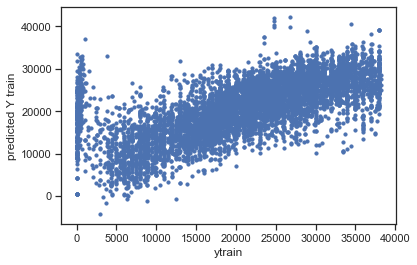

In [177]:
pred_lin_train = linear_model.predict(X_train)
plt.scatter(y_train,pred_lin_train,s=10)
plt.xlabel('ytrain')
plt.ylabel('predicted Y train')
sns.set_style('whitegrid')

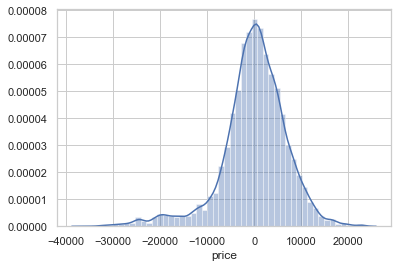

In [178]:
# nilai residual
## y_train = prediction (nilai prediksi from model)

sns.distplot((y_train - pred_lin_train), bins=50)

#### Predicting data test

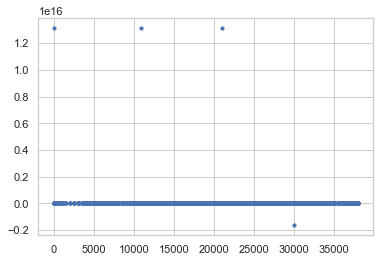

In [179]:
pred_lin_test = linear_model.predict(X_test)
plt.scatter(y_test,pred_lin_test,s=10)

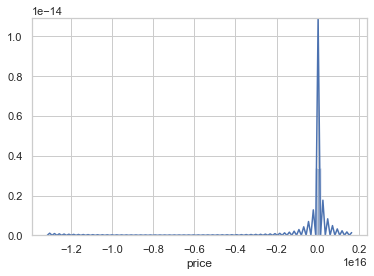

In [180]:
# nilai residual dari data test

sns.distplot((y_test-pred_lin_test), bins=50)

#### evaluation

In [108]:
from sklearn import metrics

In [109]:
print(f'MAE : {metrics.mean_absolute_error(y_train,pred_lin_train)} ')
print(f'MSE : {metrics.mean_squared_error(y_train,pred_lin_train)} ')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_train,pred_lin_train))}')
print(f'R2Score : {metrics.r2_score(y_train,pred_lin_train)}')

MAE : 5037.952832807703 
MSE : 48873606.758425646 
RMSE : 6990.966081910686
R2Score : 0.46774332612935


In [110]:
print(f'MAE : {metrics.mean_absolute_error(y_test,pred_lin_test)} ')
print(f'MSE : {metrics.mean_squared_error(y_test,pred_lin_test)} ')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,pred_lin_test))}')
print(f'R2Score : {metrics.r2_score(y_test,pred_lin_test)}')

MAE : 10959964598611.639 
MSE : 1.390472441290668e+29 
RMSE : 372890391575147.44
R2Score : -1.4950759434565916e+21


In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [113]:
get_cv_scores(linear_model)

CV Mean:  0.4491381654535266
STD:  0.018781262002652805




## 4.2 Ridge Regression

In [114]:
model_ridge = Ridge(alpha=0.001, normalize=True)

In [115]:
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

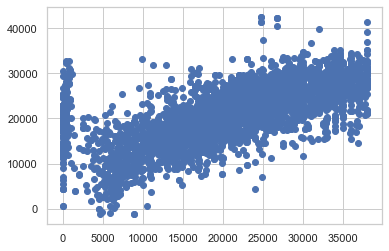

In [181]:
predictions_ridge = model_ridge.predict(X_test)
plt.scatter(y_test,predictions_ridge)

In [117]:
model_ridge.intercept_

-3113498.878721361

In [118]:
pd.DataFrame(index=X_train.columns, data = model_ridge.coef_, columns=['Coefficient'])

Coefficient
year                      1553.418248
cylinders                  897.365750
manufacturer_acura       10031.993278
manufacturer_alfa-romeo  13747.089246
manufacturer_audi         9022.925533
...                               ...
state_vt                   -41.087299
state_wa                   205.907786
state_wi                 -1501.389117
state_wv                 -3027.473517
state_wy                 -1898.595001

[123 rows x 1 columns]

In [119]:
print(f'MAE : {metrics.mean_absolute_error(y_test,predictions_ridge)} ')
print(f'MSE : {metrics.mean_squared_error(y_test,predictions_ridge)} ')
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test,predictions_ridge))}')
print(f'R2Score : {metrics.r2_score(y_test,predictions_ridge)}')

MAE : 5167.735564747135 
MSE : 51118256.0698117 
RMSE : 7149.703215505641
R2Score : 0.45036181479088266


In [120]:
get_cv_scores(model_ridge)

CV Mean:  0.4494156297037587
STD:  0.018633486805109983




In [121]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=model_ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best Score:  0.4495082826589588
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   10.0s finished


## 4.3 Lasso Regression

In [122]:
llm = Lasso(alpha=0.2)

In [123]:
llm.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [124]:
# predictions
predictions_lasso_train = llm.predict(X_train)
predictions_lasso_test = llm.predict(X_test)

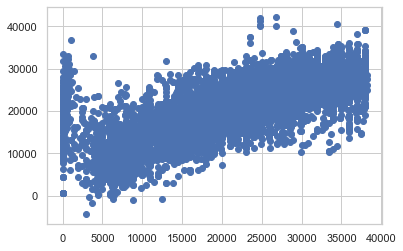

In [182]:
# prediction train
plt.scatter(y_train,predictions_lasso_train)

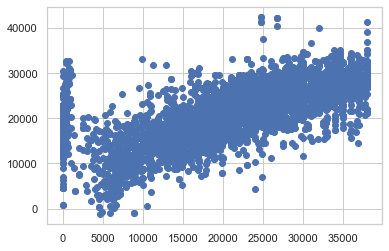

In [183]:
# prediction test
plt.scatter(y_test,predictions_lasso_test)

In [127]:
print(f'MAE :{metrics.mean_absolute_error(y_train,predictions_lasso_train)}')
print(f'MSE :{metrics.mean_squared_error(y_train,predictions_lasso_train)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_train,predictions_lasso_train))}')
print(f'R2Score : {metrics.r2_score(y_train,predictions_lasso_train)}')

MAE :5039.925384469213
MSE :48875460.1842898
RMSE :70.99243188163942
R2Score : 0.4677231414458133


In [128]:
print(f'MAE :{metrics.mean_absolute_error(y_test,predictions_lasso_test)}')
print(f'MSE :{metrics.mean_squared_error(y_test,predictions_lasso_test)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,predictions_lasso_test))}')
print(f'R2Score : {metrics.r2_score(y_test,predictions_lasso_test)}')

MAE :5167.994400569772
MSE :51112882.454225294
RMSE :71.88876407735614
R2Score : 0.4504195934505242


In [129]:
get_cv_scores(llm)

CV Mean:  0.4494586737345334
STD:  0.018515566331617595




In [130]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=llm, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   10.0s finished


Best Score:  0.4495096255799167
Best Params:  {'alpha': 1}


## 4.1 Decission Tree Regressor

In [131]:
from sklearn.tree import DecisionTreeRegressor

In [132]:
dtree = DecisionTreeRegressor(random_state=101)

In [133]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=101, splitter='best')

In [134]:
pred_dtree_test = dtree.predict(X_test)

In [135]:
pred_dtree_train = dtree.predict(X_train)

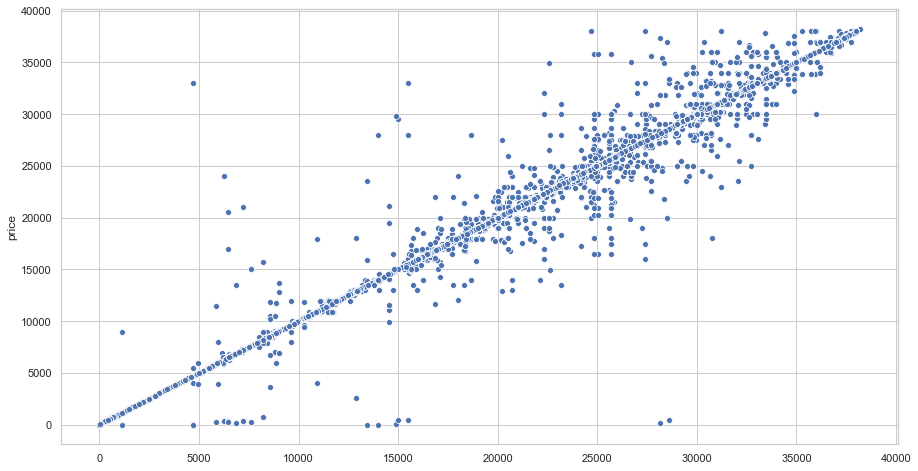

In [184]:
plt.figure(figsize=(15,8))
sns.scatterplot(pred_dtree_train,y_train)

In [137]:
print(f'MAE :{metrics.mean_absolute_error(y_train,pred_dtree_train)}')
print(f'MSE :{metrics.mean_squared_error(y_train,pred_dtree_train)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_train,pred_dtree_train))}')
print(f'R2Score : {metrics.r2_score(y_train,pred_dtree_train)}')

MAE :371.12213185661653
MSE :1987486.350181217
RMSE :19.264530408411634
R2Score : 0.9783553344172128


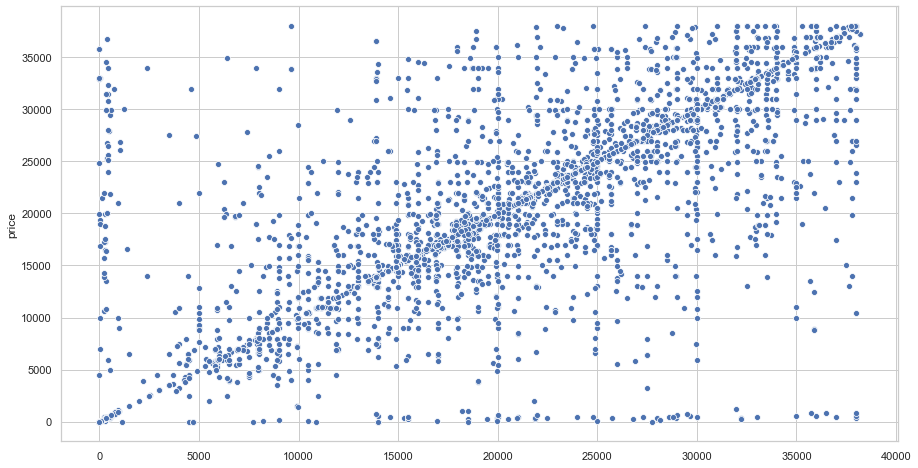

In [185]:
plt.figure(figsize=(15,8))
sns.scatterplot(pred_dtree_test,y_test)

In [139]:
print(f'MAE :{metrics.mean_absolute_error(y_test,pred_dtree_test)}')
print(f'MSE :{metrics.mean_squared_error(y_test,pred_dtree_test)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,pred_dtree_test))}')
print(f'R2Score : {metrics.r2_score(y_test,pred_dtree_test)}')

MAE :3545.413238602576
MSE :46313472.953224204
RMSE :59.54337275131949
R2Score : 0.502024224183682


In [140]:
dtree = DecisionTreeRegressor()

tuned_parameters = {
    'min_samples_leaf': [1, 2], 
    'max_depth': [None, 1], 
    'min_samples_split': [2, 3, 4],
    'splitter' : ['best','random']}

search = GridSearchCV(estimator=dtree, param_grid=tuned_parameters, cv=5,n_jobs=-1)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)


{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'splitter': 'random'}
0.5205044669350531


## 4.1 RandomForestRegressor

In [141]:
X_train.shape

(8747, 123)

In [142]:
y_train.shape

(8747,)

In [143]:
model_random = RandomForestRegressor()
model_random.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [144]:
X_test

year  cylinders  manufacturer_acura  manufacturer_alfa-romeo  \
8129   2012        8.0                   0                        0   
3649   2019        6.0                   0                        0   
10464  2018        4.0                   0                        0   
2010   2019        4.0                   0                        0   
11825  2019        4.0                   0                        0   
...     ...        ...                 ...                      ...   
1760   2020        6.0                   0                        0   
9307   2017        4.0                   0                        0   
268    2018        4.0                   0                        0   
4537   2020        8.0                   0                        0   
8916   2012        8.0                   0                        0   

       manufacturer_audi  manufacturer_bmw  manufacturer_buick  \
8129                   0                 0                   0   
3649                   0                 0                   0   
10464                  0                 0                   0   
2010                   0                 0                   0   
11825                  0                 0                   0   
...                  ...               ...                 ...   
1760                   0                 0                   0   
9307                   0                 0                   0   
268                    0                 0                   0   
4537                   0                 0                   0   
8916                   0                 0                   0   

       manufacturer_cadillac  manufacturer_chevrolet  manufacturer_chrysler  \
8129                       1                       0                      0   
3649                       0                       0                      0   
10464                      0                       0                      0   
2010                       0                       0                      0   
11825                      0                       1                      0   
...                      ...                     ...                    ...   
1760                       0                       0                      0   
9307                       0                       0                      0   
268                        0                       0                      0   
4537                       0                       1                      0   
8916                       0                       0                      0   

       ...  state_sd  state_tn  state_tx  state_ut  state_va  state_vt  \
8129   ...         0         0         0         0         0         0   
3649   ...         0         0         0         0         0         0   
10464  ...         0         0         0         0         0         0   
2010   ...         0         0         0         0         0         0   
11825  ...         0         0         0         0         0         0   
...    ...       ...       ...       ...       ...       ...       ...   
1760   ...         0         0         0         0         0         0   
9307   ...         0         0         0         0         0         0   
268    ...         0         0         0         0         0         0   
4537   ...         0         0         0         0         0         0   
8916   ...         0         0         0         0         0         0   

       state_wa  state_wi  state_wv  state_wy  
8129          0         0         0         0  
3649          0         0         0         0  
10464         0         0         0         0  
2010          0         0         0         0  
11825         0         0         0         0  
...         ...       ...       ...       ...  
1760          0         0         0         0  
9307          0         0         0         0  
268           1         0         0         0  
4537          0         0         0        

In [145]:
prediction_train = model_random.predict(X_train) 
prediction_test = model_random.predict(X_test)

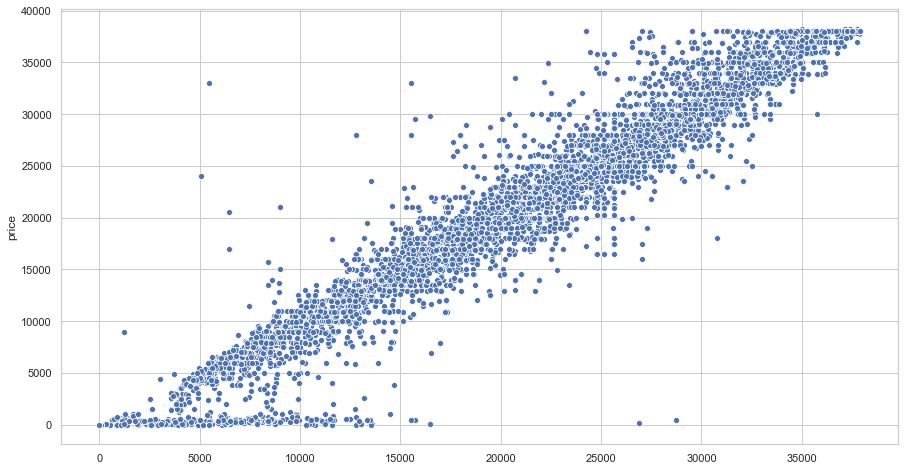

In [186]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction_train,y_train)

In [147]:
print(f'MAE :{metrics.mean_absolute_error(y_train,prediction_train)}')
print(f'MSE :{metrics.mean_squared_error(y_train,prediction_train)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_train,prediction_train))}')
print(f'R2Score : {metrics.r2_score(y_train,prediction_train)}')

MAE :1343.7222319599196
MSE :5528074.560665565
RMSE :36.656816991658175
R2Score : 0.9397966556241205


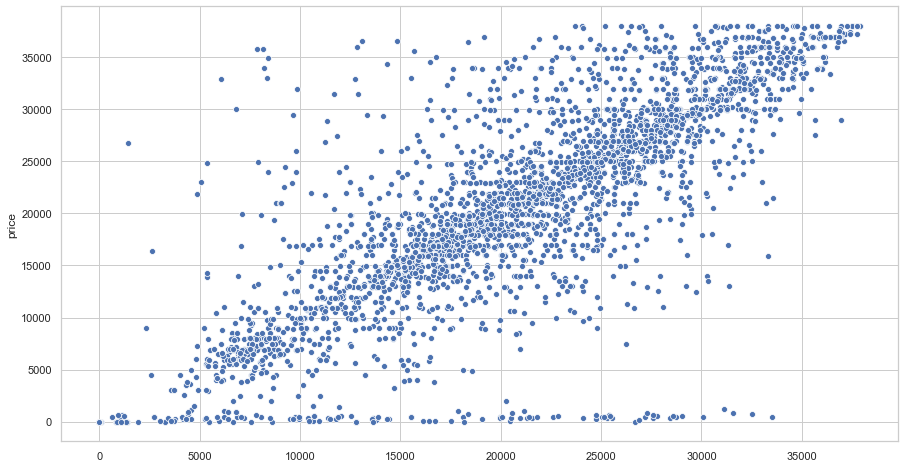

In [187]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction_test,y_test)

In [149]:
df_prediction = pd.DataFrame({'y_true' : y_test , 'y_pred' : prediction_test})
df_prediction['Selisih'] = abs(df_prediction['y_true'] - df_prediction['y_pred'])

In [150]:
df_prediction.sort_values(by='Selisih',ascending=False)

y_true        y_pred       Selisih
6262      467  33528.154500  33061.154500
6360      769  32495.700683  31726.700683
3454      798  31567.468730  30769.468730
12393    1234  31112.710000  29878.710000
10096     417  30053.550000  29636.550000
...       ...           ...           ...
11378   29900  29900.000000      0.000000
4496        1      1.000000      0.000000
2663    29500  29500.000000      0.000000
6065     8495   8495.000000      0.000000
3498        1      1.000000      0.000000

[3750 rows x 3 columns]

In [151]:
print(f'MAE :{metrics.mean_absolute_error(y_test,prediction_test)}')
print(f'MSE :{metrics.mean_squared_error(y_test,prediction_test)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,prediction_test))}')
print(f'R2Score : {metrics.r2_score(y_test,prediction_test)}')

MAE :3137.5482317382694
MSE :28962579.153778754
RMSE :56.01382179193158
R2Score : 0.6885860225098832


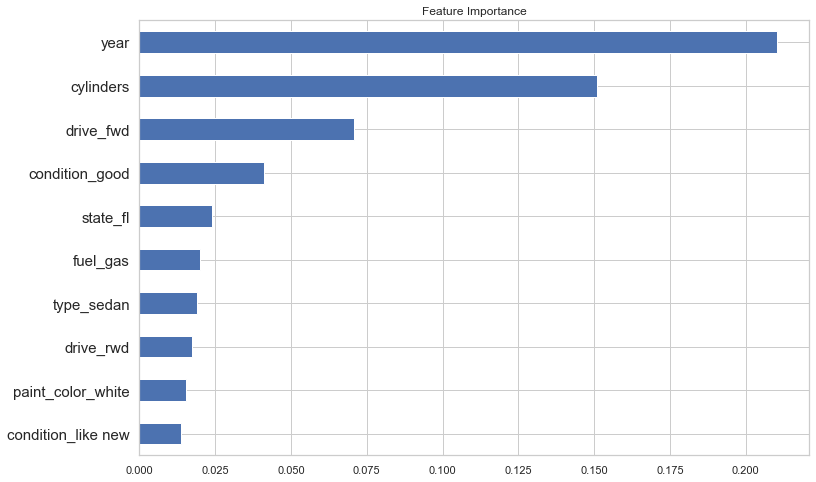

In [188]:
plt.figure(figsize=(12,8))
plt.yticks(size=15)

feat_imp = pd.Series(model_random.feature_importances_, X.columns).sort_values(ascending = True).tail(10)
feat_imp.plot(kind = 'barh', title = 'Feature Importance')

> from 

In [153]:
 tuned_parameters = {
     'n_estimators': [700, 1000], 
     'max_depth': [None, 1], 
     'min_samples_split': [1, 2]}

In [154]:
search_randomforest= GridSearchCV(estimator=model_random, param_grid=tuned_parameters, cv=5,n_jobs=-1)
search_randomforest.fit(X_train, y_train)
print(search_randomforest.best_params_)
print(search_randomforest.best_score_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 700}
0.6718822400958114


In [155]:
pred_search = search_randomforest.predict(X_test)

In [156]:
print(f'MAE :{metrics.mean_absolute_error(y_test,pred_search)}')
print(f'MSE :{metrics.mean_squared_error(y_test,pred_search)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,pred_search))}')
print(f'R2Score : {metrics.r2_score(y_test,pred_search)}')

MAE :3123.3221811101444
MSE :28731841.234326806
RMSE :55.88669055428264
R2Score : 0.6910669829544902


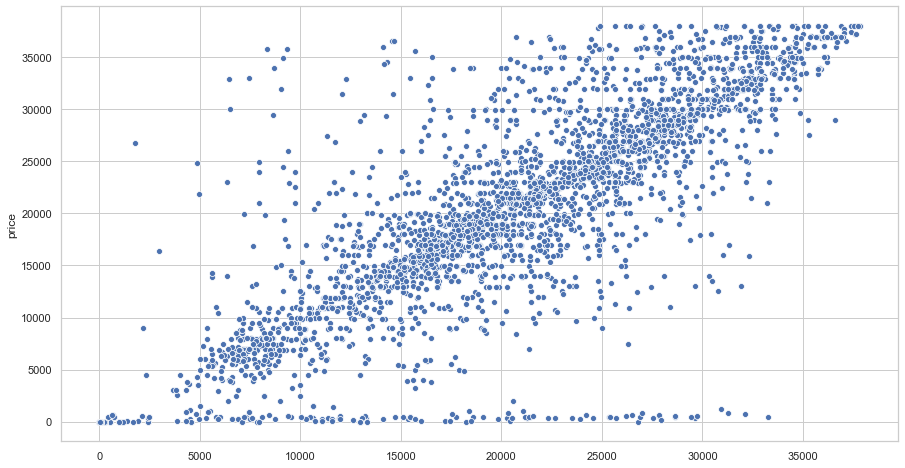

In [189]:
plt.figure(figsize=(15,8))
sns.scatterplot(pred_search,y_test)

In [158]:
# from sklearn.model_selection import RandomizedSearchCV

In [159]:
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(70, 110, num = 5)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000],
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [160]:
# max_depth

In [161]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

## XGBoost

In [162]:
from xgboost import XGBRegressor

In [163]:
xgboost = XGBRegressor(learning_rate=0.1, n_estimators=1800, max_depth=None, n_jobs=-1)

In [164]:
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1800, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [165]:
prediction_test_xgbr = xgboost.predict(X_test)

In [166]:
prediction_train_xgbr = xgboost.predict(X_train)

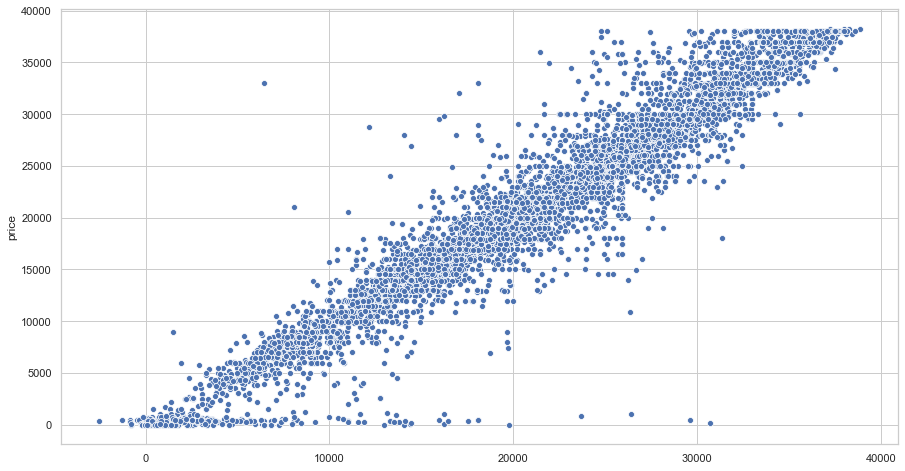

In [190]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction_train_xgbr,y_train)

In [168]:
print(f'MAE :{metrics.mean_absolute_error(y_train,prediction_train_xgbr)}')
print(f'MSE :{metrics.mean_squared_error(y_train,prediction_train_xgbr)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_train,prediction_train_xgbr))}')
print(f'R2Score : {metrics.r2_score(y_train,prediction_train_xgbr)}')

MAE :1469.8025524168133
MSE :5918372.711801057
RMSE :38.33800402233811
R2Score : 0.9355461243144904


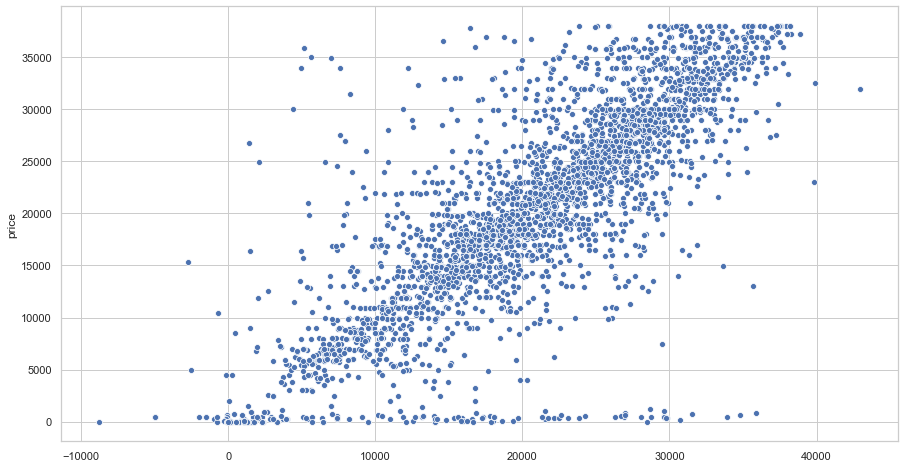

In [191]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction_test_xgbr,y_test)

In [170]:
print(f'MAE :{metrics.mean_absolute_error(y_test,prediction_test_xgbr)}')
print(f'MSE :{metrics.mean_squared_error(y_test,prediction_test_xgbr)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,prediction_test_xgbr))}')
print(f'R2Score : {metrics.r2_score(y_test,prediction_test_xgbr)}')

MAE :3296.442799968624
MSE :29361057.822966177
RMSE :57.41465666507659
R2Score : 0.6843014653004665


In [171]:
xgboost = XGBRegressor()

param_grid = {
    'n_estimators' : [500,1000],
    'learning_rate' : np.linspace(0.01, 0.1, 3),
    'max_depth': [None, 2, 3]
}

search = GridSearchCV(estimator = xgboost, param_grid = param_grid, cv = 5, n_jobs=-1)
search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=No

In [172]:
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 1000}


In [173]:
print(search.best_score_)

0.6534744288631025


In [174]:
pred_search_xgbr = search.predict(X_test)

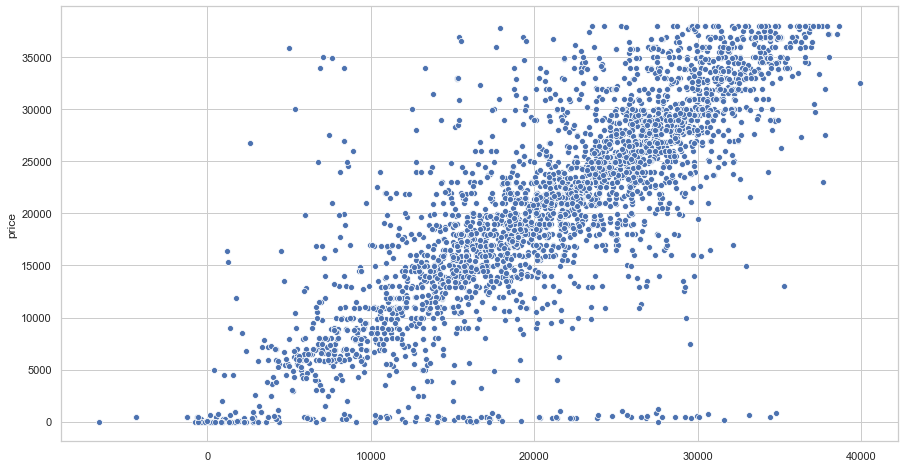

In [192]:
plt.figure(figsize=(15,8))
sns.scatterplot(pred_search_xgbr,y_test)

In [176]:
print(f'MAE :{metrics.mean_absolute_error(y_test,pred_search_xgbr)}')
print(f'MSE :{metrics.mean_squared_error(y_test,pred_search_xgbr)}')
print(f'RMSE :{np.sqrt(metrics.mean_absolute_error(y_test,pred_search_xgbr))}')
print(f'R2Score : {metrics.r2_score(y_test,pred_search_xgbr)}')

MAE :3406.8322977289836
MSE :29115336.80916802
RMSE :58.3680760153098
R2Score : 0.6869435282829619


# Export the best model 

> for teh best model i choose RandomForrestRegression

In [ ]:
# import pickle

In [ ]:
# filename = 'final_model.sav'
# pickle.dump(search_randomforest, open(filename, 'wb'))

In [ ]:
# X.columns

In [ ]:
# filename = 'x_dummies_column.sav'
# pickle.dump(X.columns, open(filename , 'wb'))

In [ ]:
# filename = 'real_column.sav'
# pickle.dump(new_df.drop('price',axis=1).columns, open(filename , 'wb'))

In [ ]:
# new_df.to_csv('new_vehicles.csv', index=False)